In [1]:
from cs103 import *
from typing import NamedTuple, List
import csv
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#starting data definitions

CharacterData = NamedTuple("CharacterData", [("name", str),
                                                    ("chapter_recruited", int),
                                                    ("hpb", int),
                                                    ("strb", int),
                                                    ("mgcb", int),
                                                    ("sklb", int),
                                                    ("spdb", int),
                                                    ("lckb", int),
                                                    ("defb", int),
                                                    ("resb", int),
                                                    ("hpg", float), #parameters hpg through resg are growth probabilities
                                                    ("strg", float),
                                                    ("mgcg", float),
                                                    ("sklg", float),
                                                    ("spdg", float),
                                                    ("lckg", float),
                                                    ("defg", float),
                                                    ("resg", float),
                                                    ("availability", int), #in range [4, 6]
                                                    ("holy_blood", int), #either 0 (for no) or 1 (for yes)
                                                    ("major_holy_blood", int), #either 0 (for no) or 1 (for yes)
                                                    ("holy_item", int), #either 0 (for no) or 1 (for yes)
                                                    ("personal_item", int), #either 0 (for no) or 1 (for yes)
                                                    ("mounted", float), #0 (for no), 1 (for yes), or 0.5 (if gained after promotion)
                                                    ("only_bows", int), #either 0 (for no) or 1 (for yes)
                                                    ("pursuit", float), #0 (for no), 1 (for yes), or 0.5 (if gained after promotion)
                                                    ("rank", int)]) #in range [1, 24], with lower rank number indicating better

# interp. a character with given traits
# "name" is fairly self-explanatory

# "chapter_recruited" indicates when the character first joins the player's army. 
# There are 6 chapters, with the last characters being recruited in chapter 4.

# "hpb" through "resb" are the character's base stats (hence the b stem), which are their stats when recruited

# "hpg" through "resg" are the probabilities for each of a character's stats to gain a point when they level up
# a small number are in excess of 1 (for example, Sigurd's hpg of 1.1). This indicates a probability of 1 to gain a point
# of hp, and a 0.1 chance to gain a second

# availability indicates the number of chapters a character is present for. There are a total of six chapters, with
# some characters being present in as few as 3

#"holy_blood" through "pursuit" are effectively boolean values, with 0 indicating the trait is not possessed, and 1
# indicating that it is possessed. For "mounted" and "pursuit", some characters gain the trait after a certain level of
# progression, which is indicated by a value of 0.5

# rank is the character's assigned rank by a community vote on /r/fireemblem
# a lower value indicates a better result. This means that traits desired by the community may end up having negative 
# correlations with rank, so I may invert the rank values so that a good trait has a positive correlation rather than a 
# negative correlation. This will not impact the strength of the result, but will make it clearer to an audience.

#examples

Sigurd = CharacterData("Sigurd", 1, 35, 14, 0, 11, 12, 7, 9, 3, 1.1, 0.5, 0.05, 0.5, 0.3, 0.4, 0.4, 0.05, 6, 1, 1, 1, 1, 1, 0, 1, 1)
Ayra = CharacterData("Ayra", 2, 32, 11, 0, 16, 17, 3, 7, 1, 0.7, 0.3, 0.05, 0.6, 0.3, 0.2, 0.2, 0.05, 5, 1, 0, 0, 1, 0, 0, 1, 17)
Lewyn = CharacterData("Lewyn", 3, 34, 1, 12, 12, 16, 7, 5, 9, 0.9, 0.1, 0.3, 0.4, 0.9, 0.2, 0.2, 0.1, 4, 1, 1, 1, 0, 0, 0, 0, 15)



@typecheck
def fn_for_character_data(cd: CharacterData) -> ...: # template based on Compound
    return ...(cd.name,
               cd.chapter_recruited,
               cd.hpb,
               cd.strb,
               cd.mgcb,
               cd.sklb,
               cd.spdb,
               cd.lckb,
               cd.defb,
               cd.resb,
               cd.hpg,
               cd.strg,
               cd.mgcg,
               cd.sklg,
               cd.spdg,
               cd.lckg,
               cd.defg,
               cd.resb,
               cd.availability,
               cd.holy_blood,
               cd.major_holy_blood,
               cd.holy_item,
               cd.personal_item,
               cd.mounted,
               cd.only_bows,
               cd.pursuit,
               cd.rank)



# List[CharacterData]
# interp. a list of Consumed

LOCD0 = []
LOCD1 = [Sigurd]
LOCD2 = [Sigurd, Ayra, Lewyn]


@typecheck
def fn_for_locd(locd: List[CharacterData]) -> ...:
    #template from arbitrary-sized
    # description of the accumulator
    acc = ...      # type: ...
    for cd in locd:
        acc = ...(cd, acc)
    return ...(acc)

In [3]:
@typecheck
def read(filename: str) -> List[CharacterData]:
    """    
    reads information from the specified file and returns a list of CharacterData
    """
    #return []  #stub
    # Template from HtDAP
    # locd contains the result so far
    locd = [] # type: List[CharacteData]

    with open(filename) as csvfile:
        
        reader = csv.reader(csvfile)
        next(reader) # skip header line

        for row in reader:
            # you may not need to store all the rows, and you may need
            # to convert some of the strings to other types
            cd = CharacterData(row[0],
                               parse_int(row[1]),
                               parse_int(row[2]),
                               parse_int(row[3]),
                               parse_int(row[4]),
                               parse_int(row[5]),
                               parse_int(row[6]),
                               parse_int(row[7]),
                               parse_int(row[8]),
                               parse_int(row[9]),
                               parse_float(row[10]),
                               parse_float(row[11]),
                               parse_float(row[12]),
                               parse_float(row[13]),
                               parse_float(row[14]),
                               parse_float(row[15]),
                               parse_float(row[16]),
                               parse_float(row[17]),
                               parse_int(row[18]),
                               parse_int(row[19]),
                               parse_int(row[20]),
                               parse_int(row[21]),
                               parse_int(row[22]),
                               parse_float(row[23]),
                               parse_int(row[24]),
                               parse_float(row[25]),
                               parse_int(row[26]))
            locd.append(cd)
    
    return locd


start_testing()

expect(read("Character Information File Test 1.csv"), [Sigurd])
expect(read("Character Information File Test 2.csv"), [Sigurd, Ayra, Lewyn])

summary()

2 of 2 tests passed


In [4]:
LOCD = read("Final Character Information File.csv")

In [5]:
@typecheck
def mounted_chars(locd: List[CharacterData]) -> List[float]:
    """
    Takes a list of CharacterData and returns a list of their mounted values.
    """
    #return [] #stub
    #template from arbitrary sized
    mounted_list = [] #type: List[float]
    for cd in locd:
        mounted_list.append(cd.mounted)
    return mounted_list

start_testing()

expect(mounted_chars([Sigurd, Ayra, Lewyn]), [1, 0, 0])
expect(mounted_chars([Ayra, Lewyn]), [0, 0])
expect(mounted_chars([Sigurd]), [1])

summary()

3 of 3 tests passed


In [6]:
@typecheck
def bow_users(locd: List[CharacterData]) -> List[int]:
    """
    Takes a list of CharacterData and returns a list of their bow values.
    """
    #template from arbitrary sized
    #return []
    only_bows_list = [] #type: List[float]
    for cd in locd:
        only_bows_list.append(cd.only_bows)
    return only_bows_list

start_testing()

expect(bow_users([Sigurd, Ayra, Lewyn]), [0, 0, 0])
expect(bow_users([Ayra, Lewyn]), [0, 0])
expect(bow_users([Sigurd]), [0])

summary()



3 of 3 tests passed


In [7]:
@typecheck
def availability(locd: List[CharacterData]) -> List[int]:
    """
    Takes a list of CharacterData and returns a list of
    their availability values.
    """
    #template from arbitrary sized
    #return [] #stub
    availability_list = [] #type: List[int]
    for cd in locd:
        availability_list.append(cd.availability)
    return availability_list

start_testing()

expect(availability([Sigurd, Ayra, Lewyn]), [6, 5, 4])
expect(availability([Ayra, Lewyn]), [5, 4])
expect(availability([Sigurd]), [6])

summary()


3 of 3 tests passed


In [8]:

@typecheck
def pursuit(locd: List[CharacterData]) -> List[float]:
    """
    Takes a list of CharacterData and returns a list of
    their pursuit values.
    """
    #template from arbitrary sized
    #return [] #stub
    pursuit_list = [] #type: List[float]
    for cd in locd:
        pursuit_list.append(cd.pursuit)
    return pursuit_list

start_testing()

expect(pursuit([Sigurd, Ayra, Lewyn]), [1, 1, 0])
expect(pursuit([Ayra, Lewyn]), [1, 0])
expect(pursuit([Sigurd]), [1])

summary()



3 of 3 tests passed


In [9]:
@typecheck
def get_rank(locd: List[CharacterData]) -> List[int]:
    """
    Takes each character's ranking and 'reverses' it, so that a low
    rank value in their character value would become a high value, and
    vice versa. This means that when a correlation is run, a desirable 
    trait will return a positive correlation and an undesirable trait
    will correlate negatively with their ranking.
    """
    #template from arbitrary sized
    #return [] stub
    
    lor = [] #type: int
    for cd in locd:
        rank = (25 - cd.rank)
        lor.append(rank)
    return lor

start_testing()

expect(get_rank([Sigurd]), [24])
expect(get_rank([Sigurd, Ayra, Lewyn]), [24, 8, 10])

summary()

2 of 2 tests passed


In [10]:
#Helper functions for bases

@typecheck
def recruited_in_chapter(cd: CharacterData, ch: int) -> bool:
    """
    Takes a CharacterData and a chapter, and returns true if the 
    character was recruited in the same chapter as ch
    """
    #return False #stub
    #template from atomic distinct
    if cd.chapter_recruited == ch:
        return True
    else: 
        return False
    
start_testing()

expect(recruited_in_chapter(Ayra, 2), True)
expect(recruited_in_chapter(Sigurd, 2), False)
expect(recruited_in_chapter(Lewyn, 3), True)

summary()

3 of 3 tests passed


In [11]:

@typecheck
def avg_chpt_bases(locd: List[CharacterData], chap: int) -> float:
    """
    Takes a list of character data, the two indexes containing the range of the character's
    bases in characterdata, and the chapter the character was recruited. Function finds
    the character's average bases, then adds them to the other characters recruited in the
    same chapter and finds the average bases for characters recruited in each chapter
    
    loab: list of average bases
    tab: total average bases. all average bases added together
    tot_char: the total number of characters. 
    oab: overall average base. Equals tab/tot_char
    """
    #template from arbitary sized
    #return 1.0 #stub
    loab = [] #acc type: list[float]
    tab = 0 #acc type: list[float]
    tot_char = 0 #acc type: int
    oab = 0 #type float
    for cd in locd:      
         if recruited_in_chapter(cd, chap):
            ab = (sum(cd[2:10])/(8))
            loab.append(ab)
            tot_char = tot_char +1
    for ab in loab: 
        tab = tab + ab
        oab = tab/tot_char
    return oab
    
start_testing()
expect(avg_chpt_bases(read("Final Character Information File.csv"), 1), 9.55)
expect(avg_chpt_bases(read("Final Character Information File.csv"), 2), 10.15)
expect(avg_chpt_bases(read("Final Character Information File.csv"), 3), 10.9375)
expect(avg_chpt_bases(read("Final Character Information File.csv"), 4), 13.875)

summary()

4 of 4 tests passed


In [12]:
@typecheck
def all_base_avgs(locd: List[CharacterData]) -> List[float]:
    """
    Takes a list of all characters, and returns the average base stats
    for characters recruited in each chapter
    """
    #return [] #stub
    #template from composition rule
    ch1_avg = avg_chpt_bases(locd, 1)
    ch2_avg = avg_chpt_bases(locd, 2)
    ch3_avg = avg_chpt_bases(locd, 3)
    ch4_avg = avg_chpt_bases(locd, 4)
    
    chapter_base_avgs = [ch1_avg, ch2_avg, ch3_avg, ch4_avg]
    return chapter_base_avgs

start_testing()

expect(all_base_avgs(LOCD), [9.55, 10.15, 10.9375, 13.875])

summary()

1 of 1 tests passed


In [13]:
@typecheck
def average_of_bases(cd: CharacterData) -> float:
    """
    Takes a CharacterData and returns the average of the
    character's bases.
    """
    #template from atomic non-distinct
    #return 1.0
    total_bases = cd.hpb + cd.strb + cd.mgcb + cd.sklb + cd.spdb + cd.lckb + cd.defb + cd.resb
    avg_base = total_bases/8
    return avg_base

start_testing()

expect(average_of_bases(Sigurd), 11.375)
expect(average_of_bases(Ayra), 10.875)
expect(average_of_bases(Lewyn), 12.0)

summary()


3 of 3 tests passed


In [14]:
@typecheck
def has_high_bases(cd: CharacterData, locd: List[CharacterData]) -> bool:
    """
    Returns True if character's bases are above the average for 
    their recruitment chapter, False if not
    """
    #template from atomic non-distinct
    #return [] #stub
    lob = cd[2:10] #takes characterdata and reduces it to a list of the character's bases
    chapt_avg = all_base_avgs(locd)[cd.chapter_recruited - 1]
    #chr = (cd.chapter_recruited - 1) #what does this even do
    return average_of_bases(cd) > chapt_avg #average_int(cd) doesn't work because it takes a list of ints

start_testing()

expect(has_high_bases(Sigurd, LOCD), True)
expect(has_high_bases(Ayra, LOCD), True)
expect(has_high_bases(Lewyn, LOCD), True)
summary()

3 of 3 tests passed


In [15]:
@typecheck
def high_bases(locd: List[CharacterData]) -> List[int]:
    """
    Takes a list of CharacterData and returns a list of integers
    with 1 for those with above average bases stats in their 
    recruitment chapter, and 0 for those with below average
    bases in their recruitment chapter.
    
    If only one character from a chapter is in the list, they will
    be returned as 0 value, because the average is equal to only
    their stats.
    
    ie. Characters recruited in later chapters come at higher level
    than those in earlier chapters, so to avoid an apples-oranges
    comparison I compare characters against others recruited in a 
    similar time to them.
    """
    #template from arbitrary sized
    #return [] #stub
    lohb = [] #type: List[int]
    all_base_avgs(locd)
    for cd in locd:
        if has_high_bases(cd, locd):
            lohb.append(1)
        elif has_high_bases(cd, locd) == False:
            lohb.append(0)
    return lohb
    

start_testing()

expect(high_bases(LOCD), [1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0])
expect(high_bases([]), [])
expect(high_bases(read("Character Information File Test Chapter 1.csv")), [1, 0, 0, 0, 1, 1, 0, 1, 0, 0])
summary()

3 of 3 tests passed


In [16]:
#high growths helper functions
@typecheck
def char_avg_growths(locd: List[CharacterData]) -> List[float]:
    """
    takes a list of character data and returns a list of average
    growths
    """
    #template from arbitrary-sized
    #return [] #stub
    char_av = [] #type float    
    for cd in locd:
        cav = (sum(cd[10:18])/8)
        char_av.append(cav)
    return char_av

@typecheck
def get_overall_avg_growth(char_av: List[float]) -> float:
    """
    takes a list of averages of character growths, and returns
    the average of the averages
    """
    #template from arbitrary-sized
    #return 0.0 #stub
    tot_av = 0
    count = 0
    
    for ca in char_av:
        tot_av = tot_av + ca
        count = count + 1  
    avg_gro = tot_av/count
    return avg_gro


@typecheck
def get_above_avg(char_av: List[float], avg_gro: float) -> List[int]:
    """
    Takes a list of average character growths and
    returns a list of integers, with 1 for those
    which are above average and 0 for those below
    average.
    """
    #template from arbitrary-sized
    #return [] #stub
    lohl = [] #type: int
    for ca in char_av:
        if ca > avg_gro:
            lohl.append(1)
        else:
            lohl.append(0)    
    return lohl

start_testing()

expect(char_avg_growths([Sigurd, Lewyn, Ayra]), [0.4125, 0.38750000000000007, 0.3])
expect(char_avg_growths([Sigurd]), [0.4125])
expect(char_avg_growths([Lewyn, Ayra]), [0.38750000000000007, 0.3])

summary()


start_testing()

expect(get_overall_avg_growth([0.4125, 0.38750000000000007, 0.3]), 0.3666666666666667)
expect(get_overall_avg_growth([0.4125]), 0.4125)
expect(get_overall_avg_growth([0.38750000000000007, 0.3]), .34375)

summary()

start_testing()

expect(get_above_avg([1.0, 3.2, 4.1], 2), [0, 1, 1])
expect(get_above_avg([0], 1), [0])
expect(get_above_avg([], 1), [])

summary()

3 of 3 tests passed
3 of 3 tests passed
3 of 3 tests passed


In [17]:
#composition of above avg growth functions

@typecheck
def high_growths(locd: List[CharacterData]) -> List[int]:
    #template from composition rule
    #return [] stub
    step1 = char_avg_growths(locd)
    step2 = get_overall_avg_growth(char_avg_growths(locd))

    return get_above_avg(step1, step2)

start_testing()

expect(high_growths([Sigurd, Ayra, Lewyn]), [1, 0, 1])
expect(high_growths(LOCD), [1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1])
summary()

2 of 2 tests passed


In [18]:

def genealogy_of_the_holy_war_character_traits_and_rankings(filename: str) -> None:
    """
    Takes a csv file and converts its information into a list of CharacterData.
    These data are analyzed and correlated with character rankings, then
    the correlation coefficients are graphed on a bar chart. The end result
    displays the magnitude and positive/negative nature of each trait's correlation
    with a high character ranking.
    
    ie. A trait mostly possessed by high-ranking characters will have a positive
    correlation, while a trait mostly possessed by low-ranking characters will 
    have a negative correlation.
    """
    #template from composition
    #return None #stub
    
    LOCD = read(filename)
    
    mount = mounted_chars(LOCD)
    bows = bow_users(LOCD)
    avail = availability(LOCD)
    purs = pursuit(LOCD)
    high_g = high_growths(LOCD)
    high_b = high_bases(LOCD)
    
    ratings = get_rank(LOCD)
    
    plt.figure(figsize = (10, 10))

    plt.xlabel("Traits")
    plt.ylabel("Correlation with high ranking")

    #plt.axis([-1, 6, -1, 1])
    traits = ["mounted", "bow_users", "availability", "pursuit", "high_growths", "high_bases"]
    correlation_strength = [np.corrcoef(mount, ratings)[1][0], 
                            np.corrcoef(bows, ratings)[1][0],
                            np.corrcoef(avail, ratings)[1][0],
                            np.corrcoef(purs, ratings)[1][0],
                            np.corrcoef(high_g, ratings)[1][0],
                            np.corrcoef(high_b, ratings)[1][0]]

    plt.bar(traits, correlation_strength)
    plt.title("Fire Emblem 4 Character Traits and Their Correlations With High Fan-Ranking")
    plt.show

    return None



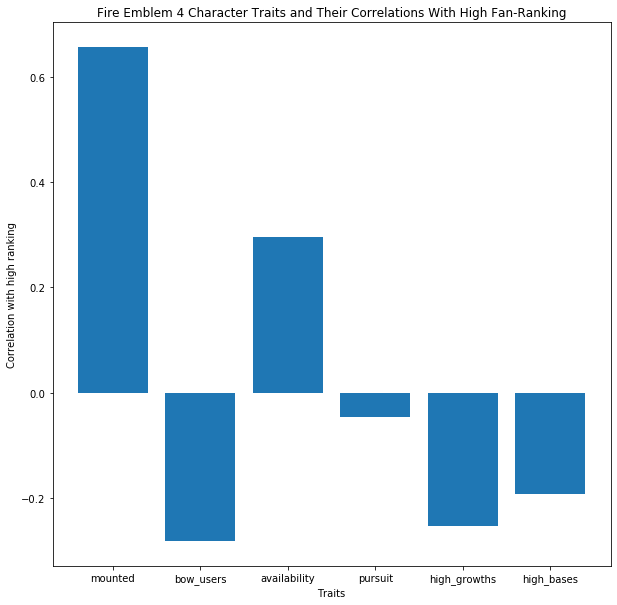

In [19]:
genealogy_of_the_holy_war_character_traits_and_rankings("Final Character Information File.csv")
##This is running on the full info set; the "true" graph.

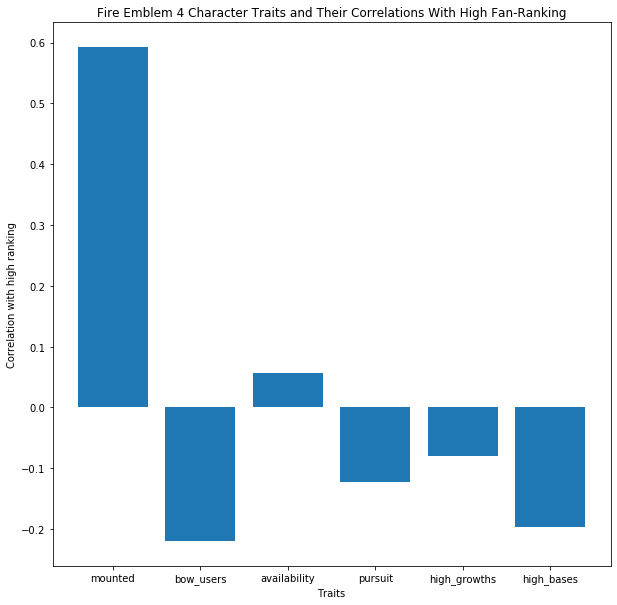

In [20]:
genealogy_of_the_holy_war_character_traits_and_rankings("Final Character Information File Test 1.csv")

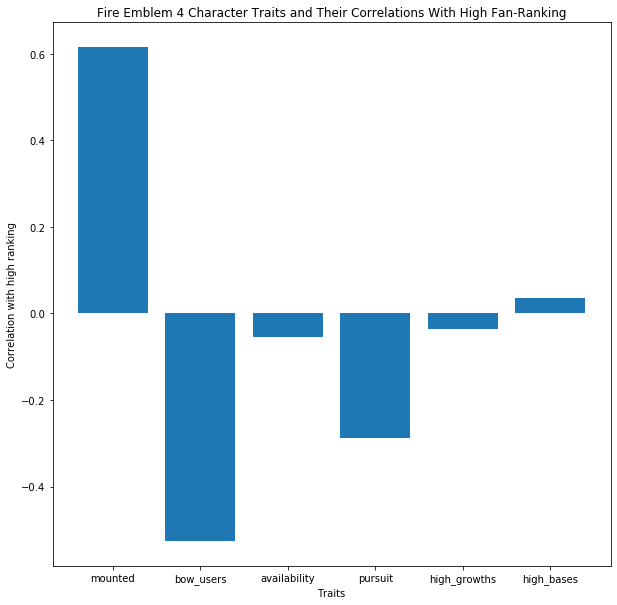

In [21]:
genealogy_of_the_holy_war_character_traits_and_rankings("Final Character Information File Test 2.csv")

# 1) What problem is the student solving?

- It's common for video game characters to have stats that increase as they level up
- Fans often make "tier lists" ranking characters in video games

- I am a big fan of Fire Emblem: Genealogy of the Holy War, an obscure 1996 videogame with a cult following
- I wanted to test a fanmade tier list to see what traits were most highly valued by players



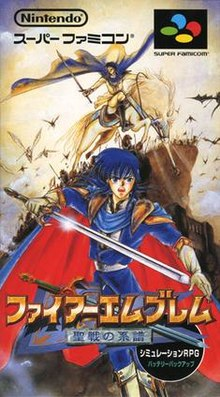


# 2) Where is the information from?

- Information was copied from a fanmade wiki, written out in an Excel file, and saved as a CSV
- Some information is made freely available to the player in game, while stat growth rates
  were datamined by other fans


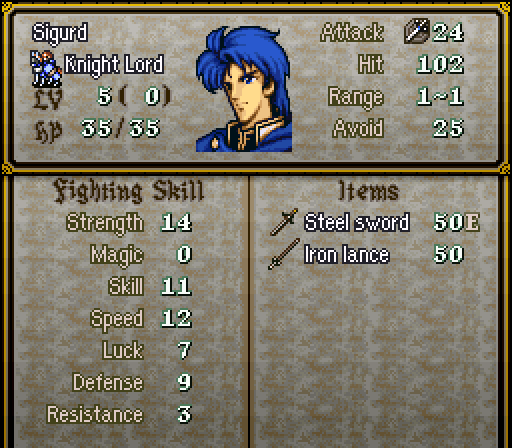



# 3) Why is it interesting to the student?


- I am a nerd

- People often argue about what is most important and which characters are best, so I was interested
  in seeing what is statistically most preferred by fans





# 1) What design choices did the student have to make?

- The main decision was about which traits were and were not worth examining
- As well, for some I needed to manipulate and do multiple steps of math on the data to make it usable

- For example, each character has a set of "Bases", which are their stats when recruited
- I wanted to see if having high Bases made a character highly ranked
- However, I can't just compare all of them at once, because characters recruited later in the game
  (who come with higher Bases to compensate for not having as much time to level up) would be distorted
- I had to find the average in each story chapter, and compare characters against others recruited at 
  the same time
- This took quite a bit of time, and more than one attempt at getting the function to work right
  






# 2) Why did the student make the choices that she/he made?

- Because of my limited time and patience I had to limit the number of traits I tested
- I tried to focus on traits I've often see come up in discussions about which characters
  are best
- There are more traits I would've checked if I had the time
- Tested if characters were "mounted', how much of th story they're present for (availability),
  and if they are limited to using only bows as their weapon

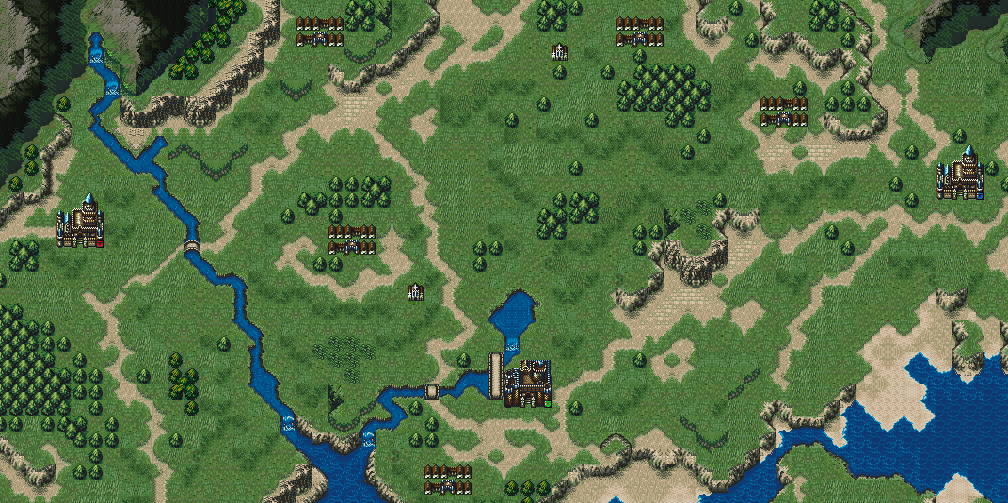
(probably don't want to walk that!)




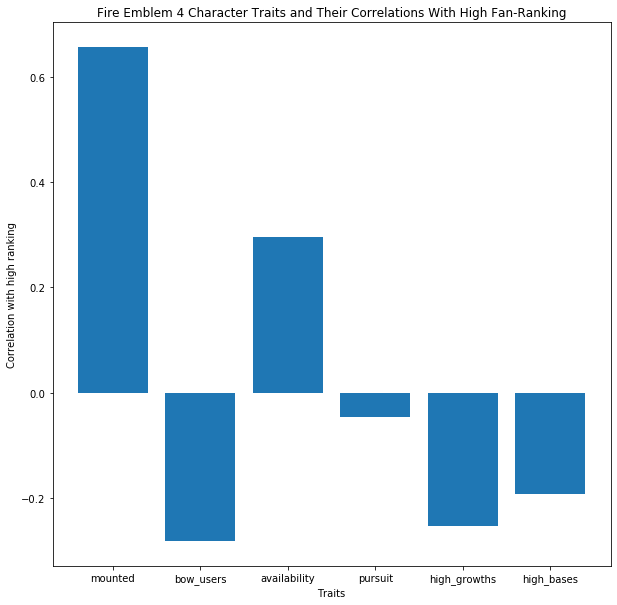

In [23]:
genealogy_of_the_holy_war_character_traits_and_rankings("Final Character Information File.csv")


# Interesting Conclusion:

- The graph indicates the two traits that correlate positively with a high rank are if a character is mounted
  and if they are present for much of the game
- Simply having strong stats is not enough, and actually correlates with a low rank
- As well, archers, who are limited by their inability to fight in close combat, rank very poorly
- The community values characters being able to be present to do things, rather than being the best at 
  dealing and taking damage



# Future Work

I'd like to refine the analysis, in a few ways. One is to expand the number of traits I check, because there are several I didn't have time to do, such as characters having holy blood or strong personal weapons, as well as if they fight with magic or physical weapons. 

As a long-run goal, trying to make some sort of predictive model to allow me to create fake characters, assign them traits from here, and have an idea of how they would be ranked, would be very interesting. But, this is much more complex than what I'm able to do now, and I don't have any clue about how to accomplish it. Perhaps as a project in a future CPSC course.